# Self-Driving Car Engineer Nanodegree

## Deep Learning



## Project: Build a Traffic Sign Recognition Classifier



In [ ]:
# Load pickled data
import pickle

training_file = 'data/train.p'
validation_file='data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


print('Shape of X_train:' + str(X_train.shape) + '\n Shape of y_train:' + str(y_train.shape))
print('Shape of X_valid:' + str(X_valid.shape) + '\n Shape of y_valid:' + str(y_valid.shape))
print('Shape of X_test:' + str(X_test.shape) + '\n Shape of y_test:' + str(y_test.shape))


Shape of X_train:(34799, 32, 32, 3)
 Shape of y_train:(34799,)
Shape of X_valid:(4410, 32, 32, 3)
 Shape of y_valid:(4410,)
Shape of X_test:(12630, 32, 32, 3)
 Shape of y_test:(12630,)


---

## Step 1: Dataset Summary & Exploration

###  Basic Summary of the Data Set Using Python, Numpy

In [ ]:
import numpy as np



# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_valid = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
random_index_int = np.random.randint(0,n_train,1,'I')
image_shape = X_train[random_index_int].shape
image_height = image_shape[1]
image_width = image_shape[2]
image_n_channels = image_shape[3]
print('\nHeight of image is:' + str(image_height) + ' \nWidth of image is:' + str(image_width) \
      + ' \nNumber of channels in image are:' + str(image_n_channels))


# Unique classes of images from data-set
test_array = [110,106,107,108,105,105,108,110,110,105,110]
unique_classes, unique_classes_indices, freq_of_classes = np.unique(y_train, return_index=True, \
                                                         return_inverse=False, return_counts=True)

# Number of unique classes/labels there are in the dataset.
n_classes = len(unique_classes)


print('\nUnique Classes \n ' + str(unique_classes))
print('\nUnique Classes respective indices \n '+ str(unique_classes_indices))
print('\nNumber of samples in each class \n' + str(freq_of_classes))


print("\nNumber of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape[1:])
print("Number of classes =", n_classes)


Height of image is:32 
Width of image is:32 
Number of channels in image are:3

Unique Classes 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]

Unique Classes respective indices 
 [ 9960  2220 31439  5370  6810 12360 21450 23730 15870 11040 17130  8580
 27329 21810 29219 29909  5010 30449 20370  6630 25950 25680  4500  1770
 10800 33449  1230 10350 26849 10560 25020   210 10140 26250 20010 18930
   900  4830 14010 25410  4200     0  9750]

Number of samples in each class 
[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Exploratory visualization of the dataset

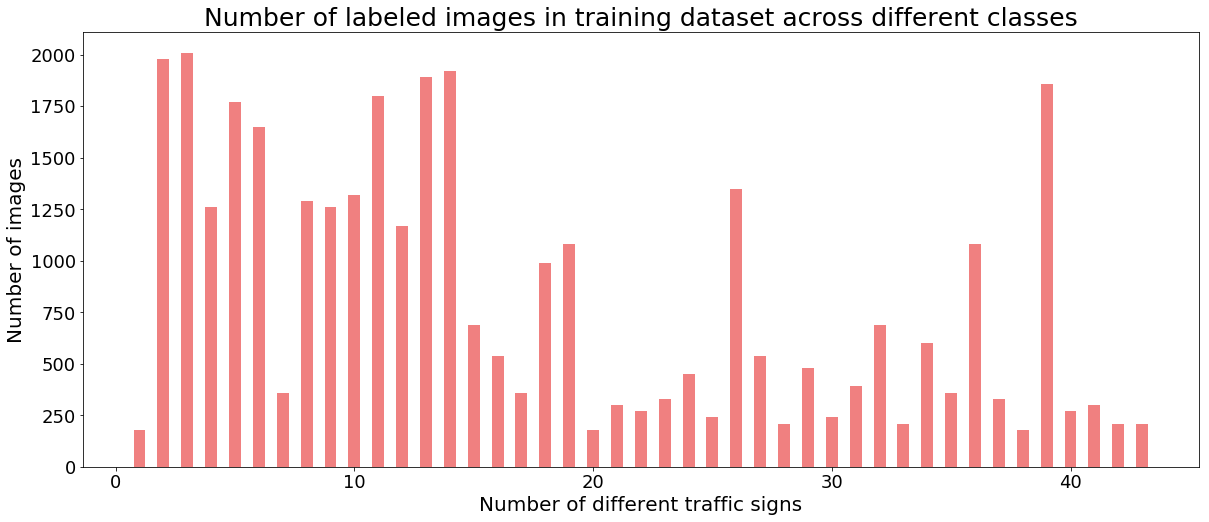

In [ ]:
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

N = n_classes
men_means = freq_of_classes

ind = np.arange(N) +1 # the x locations for the groups
width = 0.5      # the width of the bars


# Set width and height of plot
fig_size = (20.,8.)
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams["font.family"] = "DejaVu Sans"

# create bar plot
fig, ax = plt.subplots()
rects = ax.bar(ind, freq_of_classes , width, color='lightcoral')


ax.set_ylabel('Number of images',fontsize=20)
ax.set_xlabel('Number of different traffic signs',fontsize=20)
ax.set_title('Number of labeled images in training dataset across different classes',fontsize=25)


plt.show()



### Example image from each class

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


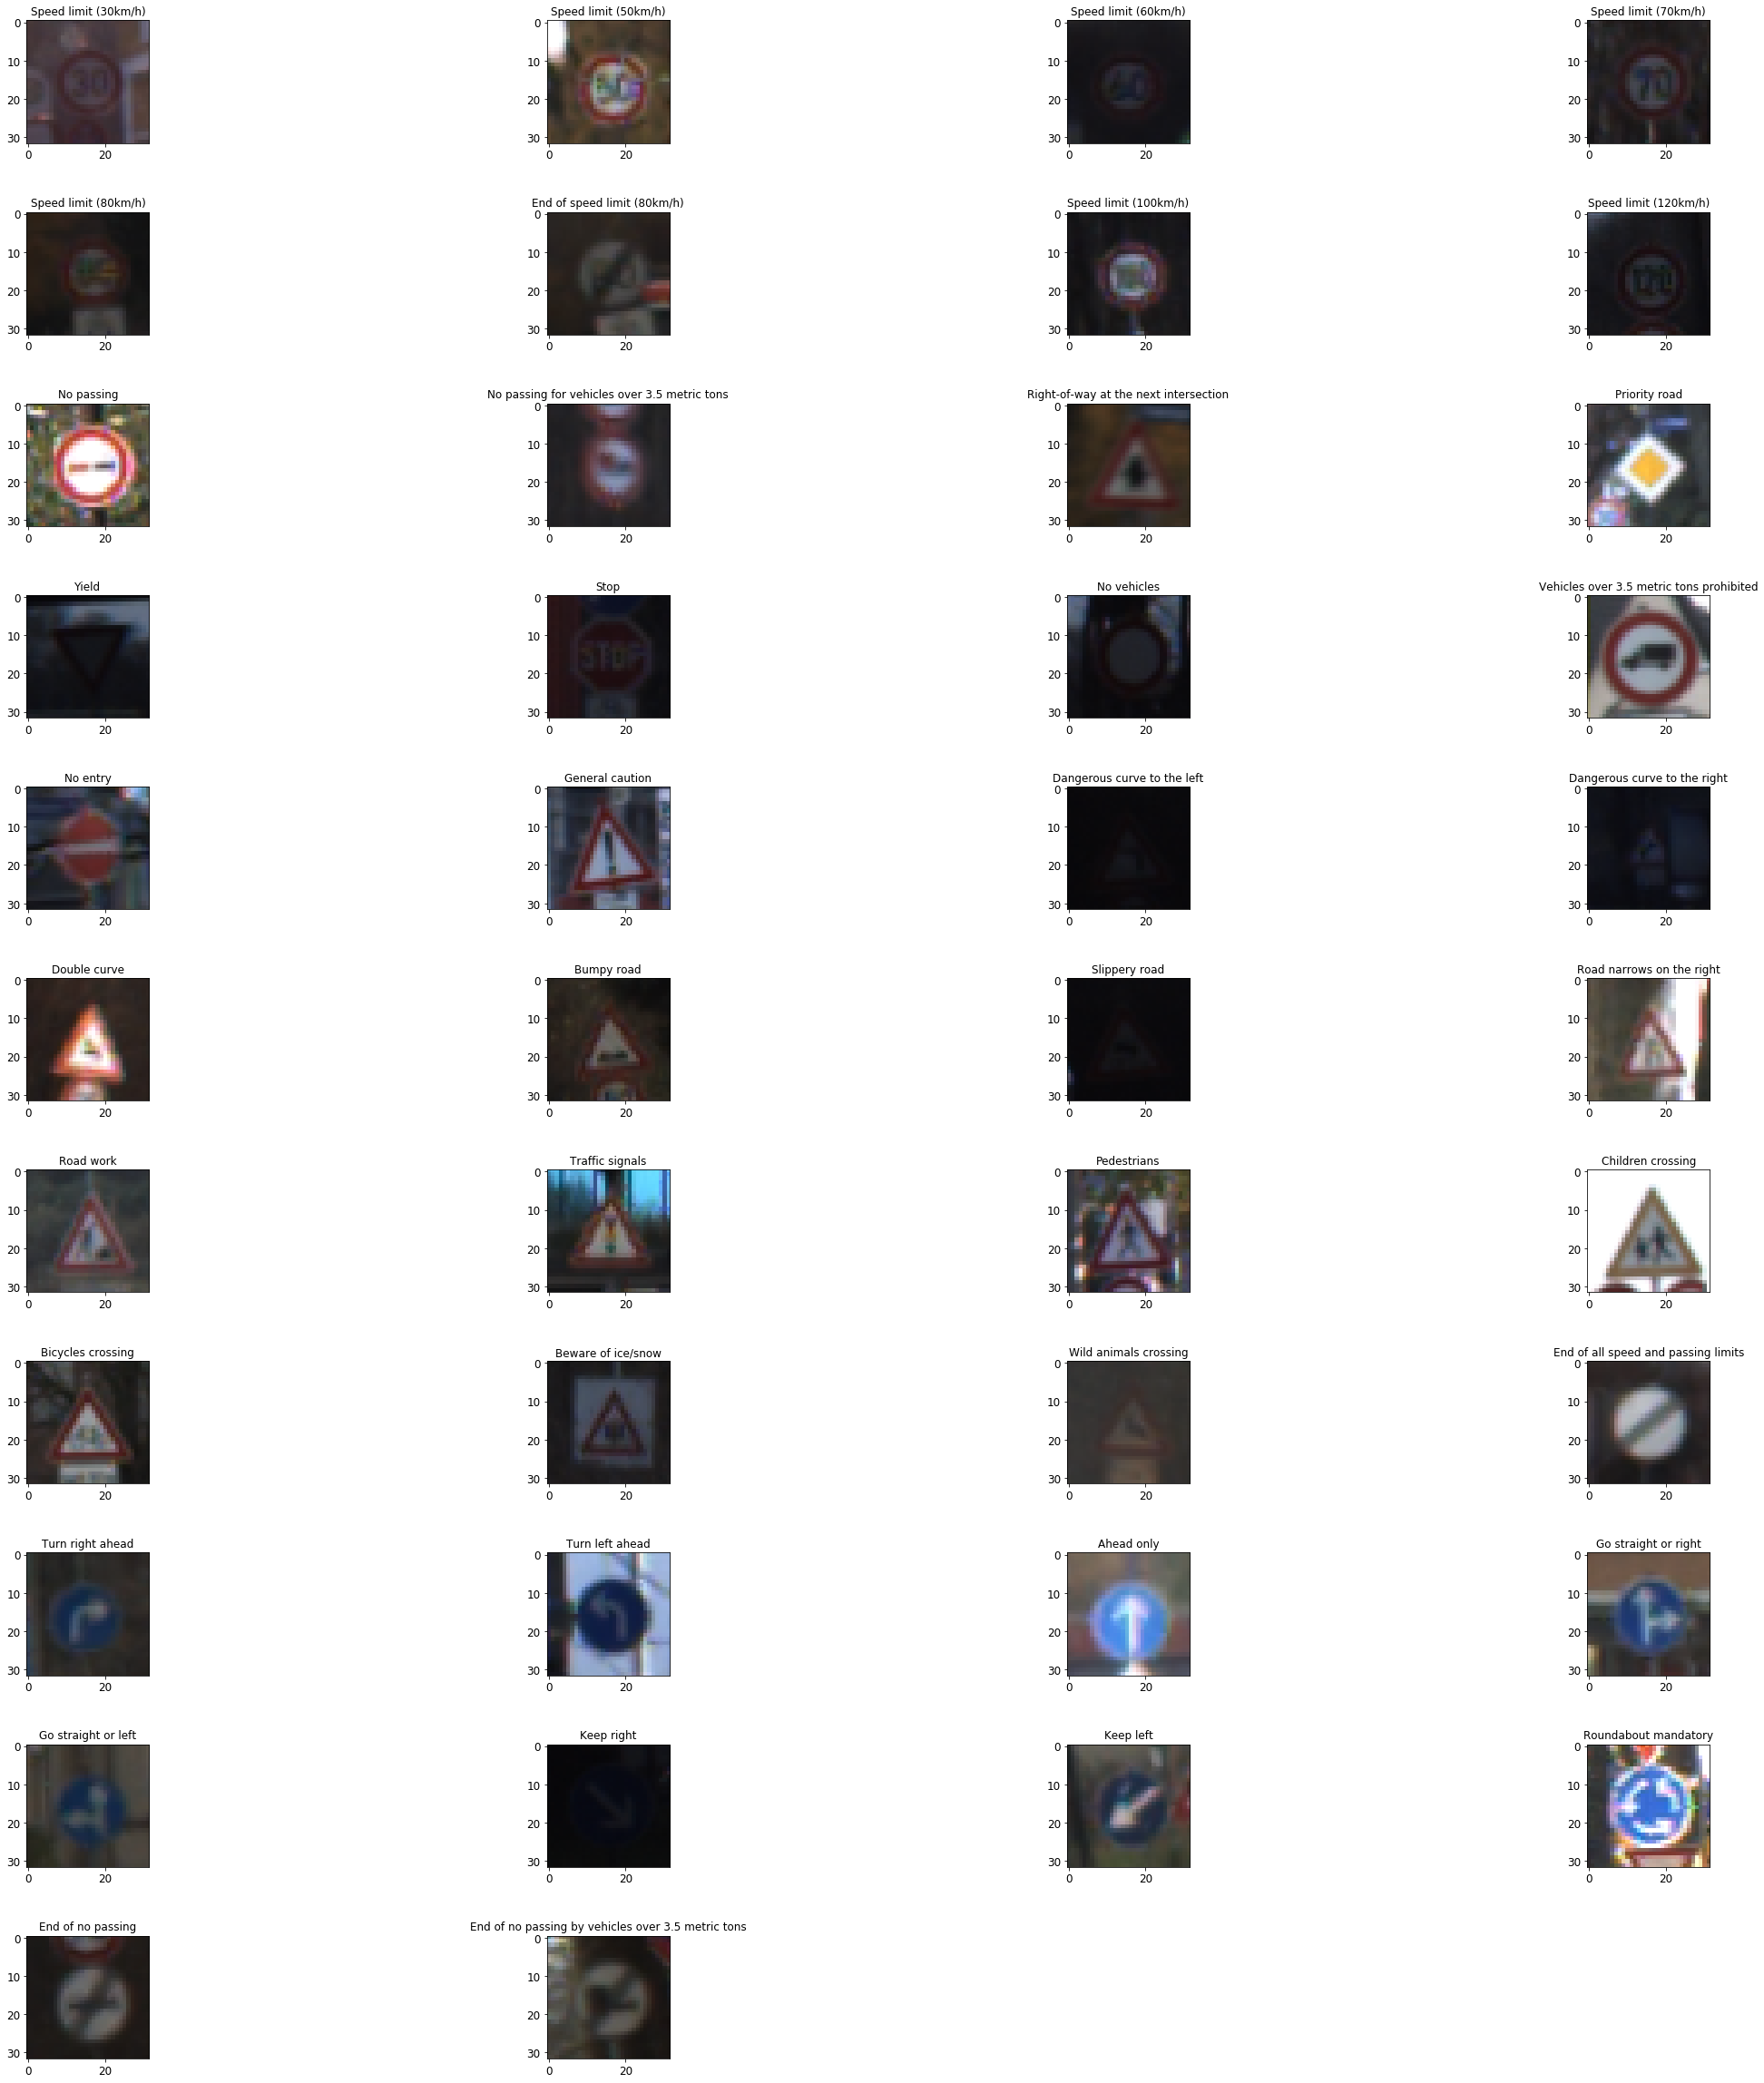

In [ ]:
w=10
h=10

# Set width and height of plot
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["font.family"] = "DejaVu Sans"


### Creating Label Dictionary
import csv

label_dict = None
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader, None)
    label_dict = {int(rows[0]):rows[1] for rows in reader}


columns = 4
rows = 11
N = n_classes
#np.random.shuffle(unique_classes_indices)
sample_images = X_train[unique_classes_indices[:]]
sample_labels = y_train[unique_classes_indices[:]]
fig = plt.figure(figsize=(32,32), tight_layout={'h_pad':4})
for i in range(1,N):
    img = sample_images[i]
    ax = fig.add_subplot(rows, columns, i)
    ax.imshow(img, interpolation='none')
    ax.set_title(label_dict[sample_labels[i]])
    ax.imshow(img)
plt.show()

----

## Step 2: Design and Test a Model Architecture



### Pre-process the Data Set (normalization, grayscale, etc.)

Random index is: 14857
(34799, 32, 32, 3)
(4410, 32, 32, 3)


  3%|▎         | 1179/34799 [00:00<00:02, 11781.53it/s]

(12630, 32, 32, 3)


100%|██████████| 12630/12630 [00:01<00:00, 12061.28it/s]


32


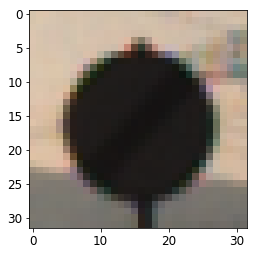

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


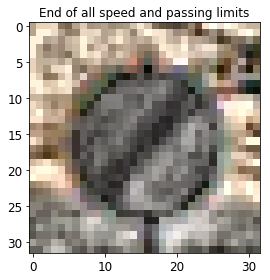

In [ ]:
from sklearn.utils import shuffle
from tqdm import tqdm
from skimage import exposure

X_train, y_train = shuffle(X_train, y_train)


############################################################################################################

from sklearn.utils import shuffle
from tqdm import tqdm
import cv2

mean = 128
random_index = np.random.randint(0, n_train)

print('Random index is: ' + str(random_index))


X_train_normalized = np.copy(X_train)
X_train_normalized.astype(float)
print(X_train_normalized.shape)
plt.figure(figsize=(4,4))
plt.imshow(X_train[random_index])


X_valid_normalized = np.copy(X_valid)
X_valid_normalized.astype(float)
print(X_valid_normalized.shape)

X_test_normalized = np.copy(X_test)
X_test_normalized.astype(float)
print(X_test_normalized.shape)

clahe = cv2.createCLAHE() # clipLimit=5.0, tileGridSize=(4,4)

def normalize_img(image):
    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0]) #cv2.equalizeHist(img_yuv[:,:,0])
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    #img_gray = cv2.cvtColor(img_output,cv2.COLOR_BGR2GRAY)
    #th3 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    #backtorgb = cv2.cvtColor(th3,cv2.COLOR_GRAY2RGB)
    return img_output


for u in tqdm(range(0,n_train)):
    image = X_train[u]
    X_train_normalized[u] = normalize_img(image)

for h in tqdm(range(0,n_valid)):
    image = X_valid[h]
    X_valid_normalized[h] = normalize_img(image)

for m in tqdm(range(0,n_test)):
    image = X_test[m]
    X_test_normalized[m] = normalize_img(image)


fig = plt.figure(figsize=(4,4), tight_layout={'h_pad':2})
ax_normalized = fig.add_subplot(1, 1, 1)
ax_normalized.set_title(label_dict[y_train[random_index]])
plt.imshow(X_train_normalized[random_index])
print(y_train[random_index])



----------------------------
### Data Augmentation


In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator

datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False
)




Using TensorFlow backend.


In [ ]:
import os
import numpy as np
from tqdm import tqdm
from sklearn.utils import shuffle

total_image_per_class = 4000
X_train_augmented = np.empty((0,32,32,3))
y_train_augmented = np.empty(0,dtype='uint8')


print('Augmenting Image Data...')
for z in tqdm(range(n_classes)):
    index = [y_train==z]
    images_for_z_class = X_train_normalized[y_train==z]
    y_z_class = y_train[y_train==z]

    X_train_augmented_z = np.copy(images_for_z_class)
    y_train_augmented_z = np.copy(y_z_class)

    for X,y in datagen.flow(images_for_z_class, y_z_class, batch_size=len(y_z_class), seed=9345+z*37):            
        X_train_augmented_z = np.append(X_train_augmented_z, X, axis=0)
        y_train_augmented_z = np.append(y_train_augmented_z, y, axis=0)

        if len(X_train_augmented_z) >= total_image_per_class:
            break

    X_train_augmented = np.append(X_train_augmented, X_train_augmented_z[:total_image_per_class], axis=0)
    y_train_augmented = np.append(y_train_augmented, y_train_augmented_z[:total_image_per_class], axis=0)              

X_train_augmented, y_train_augmented = shuffle(X_train_augmented, y_train_augmented, random_state=9345)



print('Augmenting Image Data completed..!')




  0%|          | 0/43 [00:00<?, ?it/s]

Augmenting Image Data...


100%|██████████| 43/43 [02:08<00:00,  4.48s/it]


Augmenting Image Data completed..!


-----------------------

### Model Architecture


In [ ]:

#########################       LeNet given Network       ########################################


import tensorflow as tf

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases 
    mu = 0
    sigma = 0.01
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits



##############################################################################################################



#########################        Modified Network with dropout        ########################################



import tensorflow as tf
from tensorflow.contrib.layers import flatten

from tensorflow.contrib.layers import flatten

def conv2d(x, W, b, strides, padding):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k, padding):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding=padding)


def LeNet2(x):
    
    # Input = 32x32x3
    # Hyperparameters
    mu = 0
    sigma = 0.1

    
    ### Layer 1:
    # Convolutional. Output = 28x28x6
    # Pooling. Output = 14x14x6
    W1 = tf.Variable(tf.truncated_normal([5, 5, 3, 6], mean = mu, stddev = sigma), name='W1')
    b1 = tf.Variable(tf.zeros(6), name='b1')
    layer1 = conv2d(x, W1, b1, 1, 'VALID')
    pool1 = tf.nn.dropout(maxpool2d(layer1, 2, 'VALID'), keep_prob_conv)

    ### Layer 2:
    # Convolutional: Output = 10x10x16
    # Pooling. Output = 5x5x16
    W2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu, stddev = sigma), name='W2')
    b2 = tf.Variable(tf.zeros(16), name='b2')
    layer2 = conv2d(pool1, W2, b2, 1, 'VALID')
    pool2 = tf.nn.dropout(maxpool2d(layer2, 2, 'VALID'), keep_prob_conv)
    
    ### Layer 3:
    # Fully Connected. Output = 120
    fc = flatten(pool2)
    W_fc1 = tf.Variable(tf.truncated_normal([400, 120], mean = mu, stddev = sigma), name='W_fc1')
    b_fc1 = tf.Variable(tf.zeros(120), name='b_fc1')
    fc1 = tf.nn.relu(tf.add(tf.matmul(fc, W_fc1), b_fc1))
    fc1_drop = tf.nn.dropout(fc1, keep_prob)

    ### Layer 4
    # Fully Connected. Output = 84
    W_fc2 = tf.Variable(tf.truncated_normal([120, 84], mean = mu, stddev = sigma), name='W_fc2')
    b_fc2 = tf.Variable(tf.zeros(84), name='b_fc2')
    fc2 = tf.nn.relu(tf.add(tf.matmul(fc1_drop, W_fc2), b_fc2))
    fc2_drop = tf.nn.dropout(fc2, keep_prob)
    

    ### Layer 5
    # Fully Connected. Output = n_classes
    W_fc3 = tf.Variable(tf.truncated_normal([84, 43], mean = mu, stddev = sigma), name='W_fc3')
    b_fc3 = tf.Variable(tf.zeros(43), name='b_fc3')
    logits = tf.add(tf.matmul(fc2_drop, W_fc3), b_fc3)
    
    return logits


## Features and Labels

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.


In [ ]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

resized = tf.image.resize_images(x, (227, 227))  # Used for AlexNet

keep_prob_conv = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32)

one_hot_y = tf.one_hot(y, 43)

## Training Pipeline


In [ ]:
rate = 0.001

#####################  
#nb_classes = n_classes
#fc7 = AlexNet(resized, feature_extract=True)
#fc7 = tf.stop_gradient(fc7)
#shape = (fc7.get_shape().as_list()[-1], nb_classes)
#fc8W = tf.Variable(tf.truncated_normal(shape, stddev=1e-2))
#fc8b = tf.Variable(tf.zeros(nb_classes))
#logits = tf.nn.xw_plus_b(fc7, fc8W, fc8b)
#probs = tf.nn.softmax(logits)

#########################

logits = LeNet2(x)



cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation


In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1, keep_prob_conv:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.



In [ ]:
from sklearn.utils import shuffle
from tqdm import tqdm

EPOCHS = 20
BATCH_SIZE = 128


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_augmented)
    
    print("Training...")
    print()
    for i in (range(EPOCHS)):
        X_train, y_train = shuffle(X_train_augmented, y_train_augmented)
        for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.9, keep_prob_conv:1})
            
        training_accuracy = evaluate(X_train_augmented,y_train_augmented)
        validation_accuracy = evaluate(X_valid_normalized, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    
    saver.save(sess, './traffic_sign_model')
    print("Model saved..")
    
    

Training...



100%|██████████| 1344/1344 [00:14<00:00, 94.92it/s] 


EPOCH 1 ...
Training Accuracy = 0.350
Validation Accuracy = 0.469



100%|██████████| 1344/1344 [00:11<00:00, 116.75it/s]


EPOCH 2 ...
Training Accuracy = 0.631
Validation Accuracy = 0.709



100%|██████████| 1344/1344 [00:11<00:00, 118.31it/s]


EPOCH 3 ...
Training Accuracy = 0.737
Validation Accuracy = 0.776



100%|██████████| 1344/1344 [00:11<00:00, 115.80it/s]


EPOCH 4 ...
Training Accuracy = 0.810
Validation Accuracy = 0.833



100%|██████████| 1344/1344 [00:12<00:00, 109.35it/s]


EPOCH 5 ...
Training Accuracy = 0.844
Validation Accuracy = 0.855



100%|██████████| 1344/1344 [00:11<00:00, 114.85it/s]


EPOCH 6 ...
Training Accuracy = 0.870
Validation Accuracy = 0.868



100%|██████████| 1344/1344 [00:11<00:00, 115.05it/s]


EPOCH 7 ...
Training Accuracy = 0.878
Validation Accuracy = 0.899



100%|██████████| 1344/1344 [00:12<00:00, 108.14it/s]


EPOCH 8 ...
Training Accuracy = 0.895
Validation Accuracy = 0.897



100%|██████████| 1344/1344 [00:11<00:00, 113.42it/s]


EPOCH 9 ...
Training Accuracy = 0.895
Validation Accuracy = 0.909



100%|██████████| 1344/1344 [00:12<00:00, 110.89it/s]


EPOCH 10 ...
Training Accuracy = 0.914
Validation Accuracy = 0.914



100%|██████████| 1344/1344 [00:13<00:00, 98.55it/s] 


EPOCH 11 ...
Training Accuracy = 0.918
Validation Accuracy = 0.918



100%|██████████| 1344/1344 [00:12<00:00, 111.00it/s]


EPOCH 12 ...
Training Accuracy = 0.907
Validation Accuracy = 0.916



100%|██████████| 1344/1344 [00:13<00:00, 102.07it/s]


EPOCH 13 ...
Training Accuracy = 0.927
Validation Accuracy = 0.922



100%|██████████| 1344/1344 [00:12<00:00, 105.20it/s]


EPOCH 14 ...
Training Accuracy = 0.928
Validation Accuracy = 0.931



100%|██████████| 1344/1344 [00:11<00:00, 112.54it/s]


EPOCH 15 ...
Training Accuracy = 0.934
Validation Accuracy = 0.937



100%|██████████| 1344/1344 [00:11<00:00, 120.02it/s]


EPOCH 16 ...
Training Accuracy = 0.934
Validation Accuracy = 0.928



100%|██████████| 1344/1344 [00:11<00:00, 114.39it/s]


EPOCH 17 ...
Training Accuracy = 0.932
Validation Accuracy = 0.935



100%|██████████| 1344/1344 [00:11<00:00, 119.97it/s]


EPOCH 18 ...
Training Accuracy = 0.928
Validation Accuracy = 0.924



100%|██████████| 1344/1344 [00:11<00:00, 121.55it/s]


EPOCH 19 ...
Training Accuracy = 0.933
Validation Accuracy = 0.935



100%|██████████| 1344/1344 [00:12<00:00, 111.83it/s]


EPOCH 20 ...
Training Accuracy = 0.931
Validation Accuracy = 0.934

Model saved..


## Evaluate the Model


In [ ]:

with tf.Session() as sess:
    saver.restore(sess, './traffic_sign_model')
    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    

Test Accuracy = 0.931


---

## Step 3: Test a Model on New Images


### Load and Output the Images

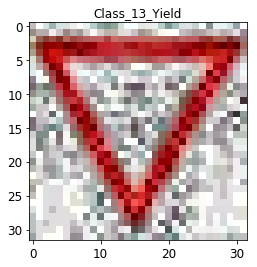

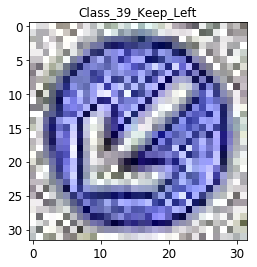

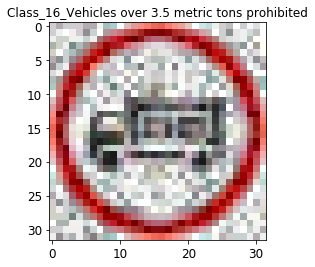

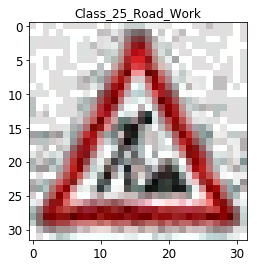

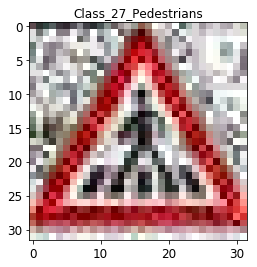

(5, 32, 32, 3)


In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2
from numpy import newaxis
test_pics = []

img1 = cv2.imread('./testImages/1.jpg')
img2 = cv2.imread('./testImages/2.jpg')
img3 = cv2.imread('./testImages/3.jpg')
img4 = cv2.imread('./testImages/4.jpg')
img5 = cv2.imread('./testImages/5.jpg')

plt.figure(1)


#img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1 = cv2.resize(img1, (32, 32))
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img1 = normalize_img(img1)
plt.imshow(img1)
plt.title('Class_13_Yield')
plt.show()


img2 = cv2.resize(img2, (32, 32)) 
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
img2 = normalize_img(img2)
plt.imshow(img2)
plt.title('Class_39_Keep_Left')
plt.show()

img3 = cv2.resize(img3, (32, 32)) 
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
img3 = normalize_img(img3)
plt.imshow(img3)
plt.title('Class_16_Vehicles over 3.5 metric tons prohibited')
plt.show()

img4 = cv2.resize(img4, (32, 32)) 
img4 = cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)
img4 = normalize_img(img4)
plt.imshow(img4)
plt.title('Class_25_Road_Work')
plt.show()

img5 = cv2.resize(img5, (32, 32)) 
img5 = cv2.cvtColor(img5,cv2.COLOR_BGR2RGB)
img5 = normalize_img(img5)
plt.imshow(img5)
plt.title('Class_27_Pedestrians')
plt.show()


test_pics.append(img1)
test_pics.append(img2)
test_pics.append(img3)
test_pics.append(img4)
test_pics.append(img5)
test_pics = np.array(test_pics)
#test_pics = test_pics[..., newaxis]
print(test_pics.shape)



### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, './traffic_sign_model')

    test_image_classes = sess.run(tf.nn.softmax(logits), feed_dict={x: test_pics, keep_prob:1, keep_prob_conv:1})
    
    predicts = sess.run(tf.nn.top_k(test_image_classes, k=5, sorted=True))

  

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
     
for i in range(len(predicts[0])):
    print('Image', i+1, 'probabilities:', predicts[0][i]/100,
          '\n and top 5 predicted classes:', predicts[1][i],'\n')
    
for j in range(len(predicts[0])):
    print('Image', j+1, 'has highest probability of being classified into class: ', predicts[1][j][0])

Image 1 probabilities: [9.9999998e-03 8.7354388e-11 3.2471909e-12 1.5643193e-13 7.9147721e-14] 
 and top 5 predicted classes: [13 32 12 15 14] 

Image 2 probabilities: [9.9999961e-03 2.7645293e-09 4.1181292e-10 1.4186084e-12 3.8707367e-13] 
 and top 5 predicted classes: [39 33 37 12 40] 

Image 3 probabilities: [9.2119016e-03 6.1839260e-04 7.5420605e-05 4.8418748e-05 2.6563845e-05] 
 and top 5 predicted classes: [16 41 32  9 42] 

Image 4 probabilities: [9.9999998e-03 4.0198042e-10 7.4775193e-11 5.1372684e-11 1.1969012e-12] 
 and top 5 predicted classes: [25 29 22 30 31] 

Image 5 probabilities: [9.9999998e-03 4.9895717e-12 3.2212206e-12 4.4487303e-13 9.7700094e-14] 
 and top 5 predicted classes: [27 26 18 24 25] 

Image 1 has highest probability of being classified into class:  13
Image 2 has highest probability of being classified into class:  39
Image 3 has highest probability of being classified into class:  16
Image 4 has highest probability of being classified into class:  25
Ima

### Project Writeup

Please check project writup that is submitted with this file.


-----------------------

### End of file